### Imports

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [12]:
df = pd.read_csv('/content/drive/MyDrive/Projects/census-income.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [13]:
# from google.colab import drive
# drive.mount('/content/drive')

#### EDA

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [16]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

In [17]:
for i in df.columns:
    print(i)
    print(df[i].unique())

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt
[ 77516  83311 215646 ...  34066  84661 257302]
education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-

In [18]:
df.replace('?', np.nan, inplace=True)

In [19]:
for i in df.columns:
    print(i)
    print(df[i].unique())

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt
[ 77516  83311 215646 ...  34066  84661 257302]
education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-

In [20]:
df.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [21]:
df.dropna(inplace=True)

In [22]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [23]:
df.duplicated().sum()

np.int64(23)

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.duplicated().sum()

np.int64(0)

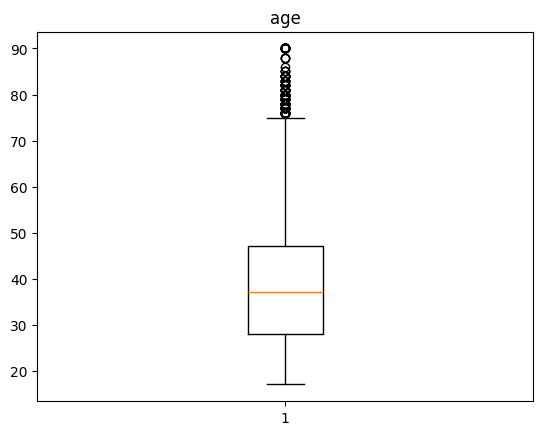

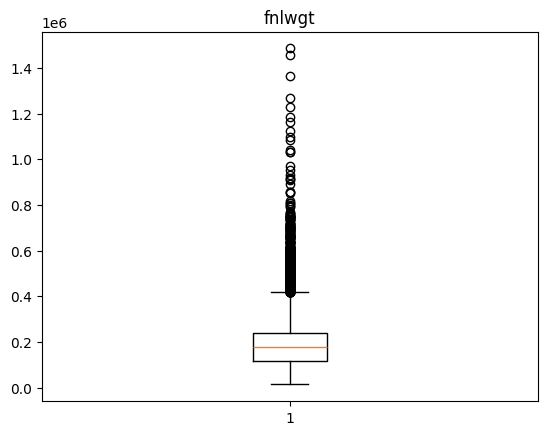

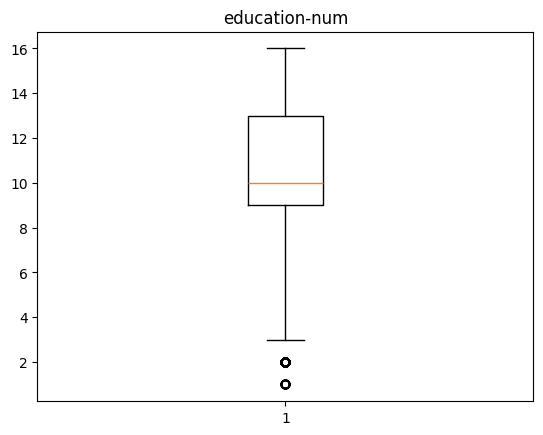

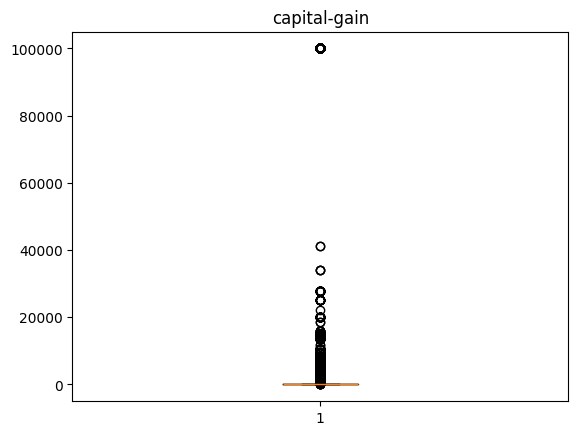

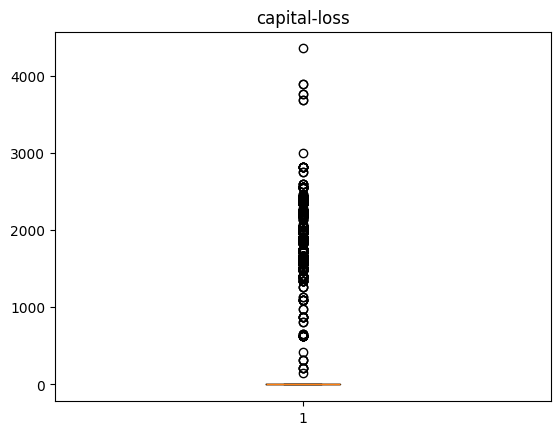

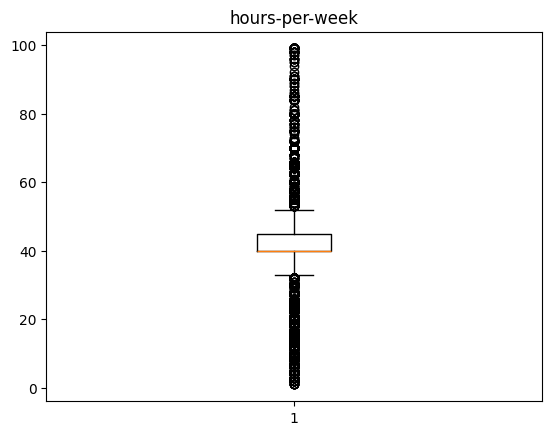

In [26]:
for i in df.columns:
    if df[i].dtypes != 'object':
        plt.boxplot(df[i])
        plt.title(i)
        plt.show()

In [27]:
df['capital-gain'].value_counts()

,count
capital-gain,
0,27601
15024,337
7688,270
7298,240
99999,148
...,...
7978,1
1173,1
2387,1


In [28]:
df['capital-loss'].value_counts()

,count
capital-loss,
0,28712
1902,194
1977,162
1887,155
1848,50
...,...
2201,1
2467,1
2472,1


In [29]:
cols = ['age','fnlwgt','education-num','hours-per-week']

In [30]:
for i in cols:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    df=df[(df[i] <= upper) & (df[i] >= lower)]

In [31]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


#### Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()

In [34]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=le.fit_transform(df[i])

In [35]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,5,77516,8,13,4,0,1,4,1,2174,0,40,38,0
2,38,2,215646,10,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,8,13,2,9,5,2,0,0,0,40,4,0
5,37,2,284582,11,14,2,3,5,4,0,0,0,40,38,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21317 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             21317 non-null  int64
 1   workclass       21317 non-null  int64
 2   fnlwgt          21317 non-null  int64
 3   education       21317 non-null  int64
 4   education-num   21317 non-null  int64
 5   marital-status  21317 non-null  int64
 6   occupation      21317 non-null  int64
 7   relationship    21317 non-null  int64
 8   race            21317 non-null  int64
 9   sex             21317 non-null  int64
 10  capital-gain    21317 non-null  int64
 11  capital-loss    21317 non-null  int64
 12  hours-per-week  21317 non-null  int64
 13  native-country  21317 non-null  int64
 14  annual_income   21317 non-null  int64
dtypes: int64(15)
memory usage: 2.6 MB


In [37]:
df['annual_income'].value_counts()

,count
annual_income,
0,15709
1,5608


### Model Building

In [38]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

#### Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

#### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
log= LogisticRegression()
log.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
y_pred = log.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
from sklearn.metrics import *

In [45]:
log_acc = accuracy_score(y_pred, y_test)
log_acc

0.7792370231394622

In [46]:
confusion_matrix(y_pred, y_test)

array([[4529, 1224],
       [ 188,  455]])

#### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt = DecisionTreeClassifier(random_state=43)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=43)

In [49]:
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [50]:
dt_acc = accuracy_score(y_pred, y_test)
dt_acc

0.7923702313946216

#### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier(oob_score=True)
rf.fit(x_train, y_train)

RandomForestClassifier(oob_score=True)

In [53]:
y_pred = rf.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [54]:
rf_acc = accuracy_score(y_pred, y_test)
rf_acc

0.8391181988742964

In [55]:
rf.oob_score_

0.838348636150392

### Boostings

#### AdaBoost

In [56]:
from sklearn.ensemble import AdaBoostClassifier

In [57]:
ada = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=42)
ada.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=42)

In [58]:
y_pred = ada.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [59]:
ada_acc = accuracy_score(y_test, y_pred)
ada_acc

0.8380237648530331

#### Gradient Boosting

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
gb = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,random_state=42)
gb.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [62]:
y_pred = gb.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [63]:
gb_acc=accuracy_score(y_test,y_pred)
gb_acc

0.8577235772357723

**XGboost**

In [65]:
from xgboost import XGBClassifier

In [66]:
model=XGBClassifier(eta=0.12)
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.12, eval_metric=None,
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [67]:
pred=model.predict(x_test)
xgb_acc=accuracy_score(y_test,pred)
xgb_acc

0.8600687929956222

In [68]:
print("Logistic Regression Accuracy:", log_acc)
print("Decision Tree Accuracy:", dt_acc)
print("Random Forest Accuracy:", rf_acc)
print("AdaBoost Accuracy:", ada_acc)
print("Gradient Boosting Accuracy:", gb_acc)
print("XGBoost Accuracy:", xgb_acc)

Logistic Regression Accuracy: 0.7792370231394622
Decision Tree Accuracy: 0.7923702313946216
Random Forest Accuracy: 0.8391181988742964
AdaBoost Accuracy: 0.8380237648530331
Gradient Boosting Accuracy: 0.8577235772357723
XGBoost Accuracy: 0.8600687929956222
